[LinkedIn Post](https://www.linkedin.com)

---
### **Normal Exponentiation**

- **Time Complexity:** O($k$)

where $k$ is the exponent.

$$a^k = \underbrace{a \times a \times \ldots \times a}_{k \text{ times}}$$

In [91]:
def normal_exponentiation(a, k):
	result = 1
	for _ in range(k):
		result *= a
	return result

In [92]:
normal_exponentiation(3, 32)

1853020188851841

---
### **Fast (Binary) Exponentiation**

- **Time Complexity:** O($\log_2 k$)

where $k$ is the exponent.

In [93]:
def fast_exponentiation(a, k):
	# Get binary representation
	bits = bin(k)[2:]
	
	# Iterate through bits from Left to Right
	result = 1
	for bit in bits:
		# Step A: Always Square
		result = result * result
		
		# Step B: Multiply if bit is '1'
		if bit == '1':
			result = result * a
	
	return result

In [94]:
fast_exponentiation(3, 32)

1853020188851841

---
#### **Math Trick**

- **Time Complexity:** O($1$)

$$a^k = e^{k \cdot \ln(a)}$$

where $k$ is the exponent.

In [95]:
import math

# For k < 646
def math_pow(a, k):
	# Formula: a^k = e^(k * ln(a))
	return math.exp(k * math.log(a))

In [96]:
k = 646
math_pow(3, k)

1.6608505280234626e+308

##### **Handling large expoenents**

In [97]:
from decimal import Decimal, getcontext

def math_pow_huge(a, k):
	# Increase the "Exponent Limit" (we might need more)
	getcontext().Emax = 1_000_000  # Allow huge exponents
	getcontext().prec = 50         # Set precision (digits of accuracy)

	# Convert to Decimal objects
	a = Decimal(a)
	k = Decimal(k)

	# Formula: a^k = e^(k * ln(a))
	# Note: Decimal uses .ln() and .exp() methods
	log_val = k * a.ln()
	result  = log_val.exp()
	
	return result

math_pow_huge(3, 500000)

Decimal('4.2399411749171047173067966906742244676692202993351E+238560')

---
#### **Comparison of Methods**

In [98]:
def measure(fun):
	from time import perf_counter_ns
	start_time = perf_counter_ns()
	fun()
	end_time = perf_counter_ns()
	return end_time - start_time  # Time in nanoseconds

In [99]:
k = 500
normal = measure(lambda: normal_exponentiation(3, k))
fast   = measure(lambda: fast_exponentiation(3, k))
math   = measure(lambda: math_pow(3, k))

print(f"Normal Exponentiation Time: {normal:.6f} seconds")
print(f"Fast   Exponentiation Time: {fast:.6f}  seconds")
print(f"Math   Exponentiation Time: {math:.6f}  seconds")

Normal Exponentiation Time: 37000.000000 seconds
Fast   Exponentiation Time: 5600.000000  seconds
Math   Exponentiation Time: 4300.000000  seconds


---
#### **Plotting Performance**

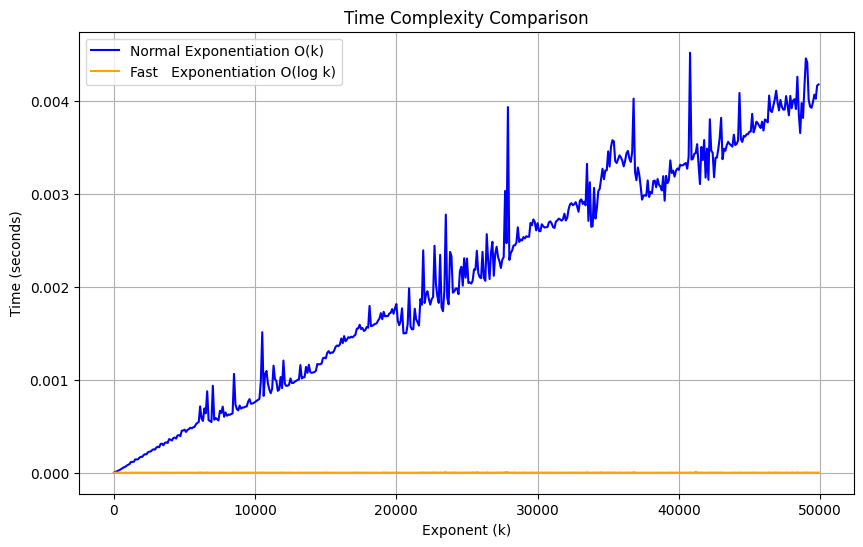

In [ ]:
import matplotlib.pyplot as plt
import time

# Define the MOD to keep numbers small (Constant Time Arithmetic)
MOD = 1_000_000_007 

def normal_exponentiation(base, k):
	res = 1
	for _ in range(k):
		res = (res * base) % MOD 
	return res

def fast_exponentiation(base, k):
	return pow(base, k, MOD)

# Setup the test values
k_values = list(range(1, 50001, 100))  # Test up to k=50000 (step 100)
normal_times = []
fast_times   = []
# math_times   = []

# Benchmark
for k in k_values:
	# Measure Normal Time
	start_time = time.perf_counter()
	normal_exponentiation(3, k)
	normal_times.append(time.perf_counter() - start_time)
	
	# Measure Fast Time
	start_time = time.perf_counter()
	fast_exponentiation(3, k)
	fast_times.append(time.perf_counter() - start_time)

	# Measure Math Time (Optional)
	# start_time = time.perf_counter()
	# math_pow_huge(3, k)
	# math_times.append(time.perf_counter() - start_time)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, normal_times, label='Normal Exponentiation O(k)'    , color='blue')
plt.plot(k_values, fast_times  , label='Fast   Exponentiation O(log k)', color='orange')
# plt.plot(k_values, math_times  , label='Math   Exponentiation O(1)'    , color='green')

plt.xlabel('Exponent (k)')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity Comparison')
plt.legend()
plt.grid(True)
# plt.savefig('comparison.png', dpi=300)
plt.show()